# **Artificial Neural Network**

## **Iris Dataset**

### **Import Library**

In [19]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd

from IPython.display import display, HTML
import matplotlib.pyplot as plt

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense


### **Load Dataset**

In [20]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [21]:

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

display(HTML(df.head().to_html()))
df.value_counts('target')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


target
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
print(df.shape)

(150, 5)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


### **Train-Validation-Test Split**



In [24]:
X = iris.data
y = iris.target

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

print('X_train', X_train.shape)
print('X_val', X_val.shape)
print('X_test', X_test.shape)

Y_train = to_categorical(Y_train, 3)
Y_val = to_categorical(Y_val, 3)
Y_test = to_categorical(Y_test, 3)

print("Contoh data label sebelum one-hot encoding:", y[:5])
print("Contoh data label setelah one-hot encoding:", Y_train[:5])


X_train (108, 4)
X_val (27, 4)
X_test (15, 4)
Contoh data label sebelum one-hot encoding: [0 0 0 0 0]
Contoh data label setelah one-hot encoding: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


### **Define and Compile Model**

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(4,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 515 (2.01 KB)

 Trainable params: 515 (2.01 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model**

In [26]:
history = model.fit(X_train,Y_train,epochs=64,batch_size=5,validation_data=(X_val,Y_val))

Epoch 1/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.3981 - loss: 1.1377 - val_acc: 0.2963 - val_loss: 0.9564
Epoch 2/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5370 - loss: 0.8482 - val_acc: 0.7407 - val_loss: 0.7323
Epoch 3/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8148 - loss: 0.7166 - val_acc: 0.8519 - val_loss: 0.6271
Epoch 4/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.7222 - loss: 0.6276 - val_acc: 0.8148 - val_loss: 0.5509
Epoch 5/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8519 - loss: 0.5670 - val_acc: 0.9259 - val_loss: 0.5009
Epoch 6/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8796 - loss: 0.5339 - val_acc: 0.9259 - val_loss: 0.4609
Epoch 7/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9352 - loss: 0.4992 - val_acc: 0.8519 - val_loss: 0.4310
Epoch 8/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.8796 - loss: 0.4691 - val_acc: 0.9259 - val_loss: 0.4026
Epoch 9/64
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9167 - loss:

### **Evaluation Model**

In [27]:

loss, accuracy = model.evaluate(X_test, Y_test)

print('Akurasi Testing MLP:', accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc: 1.0000 - loss: 0.1238
Akurasi Testing MLP: 1.0


### **Prediction**

In [28]:
# Membuat prediksi pada data testing
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)
# Membuat confusion matrix
cm = confusion_matrix(Y_true, Y_pred_classes)
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[[5 0 0]
 [0 5 0]
 [0 0 5]]


### **Visualization**

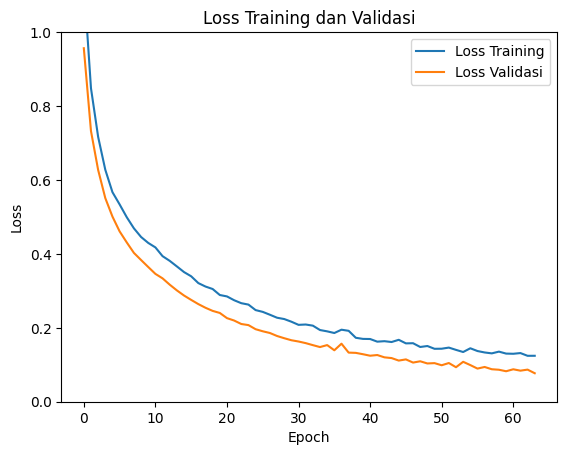

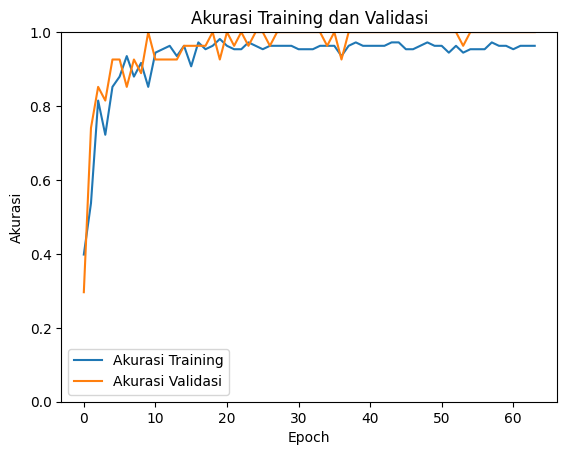

In [ ]:

plt.plot(history.history['loss'], label='Loss Training')  
plt.plot(history.history['val_loss'], label='Loss Validasi')  
plt.title('Loss Training dan Validasi')  
plt.xlabel('Epoch')  
plt.ylabel('Loss')  
plt.ylim(0, 1)  
plt.legend()  
plt.show()  


plt.plot(history.history['acc'], label='Akurasi Training') 
plt.plot(history.history['val_acc'], label='Akurasi Validasi')  
plt.title('Akurasi Training dan Validasi')  
plt.xlabel('Epoch')  
plt.ylabel('Akurasi')  
plt.ylim(0, 1)  
plt.legend()  
plt.show()  

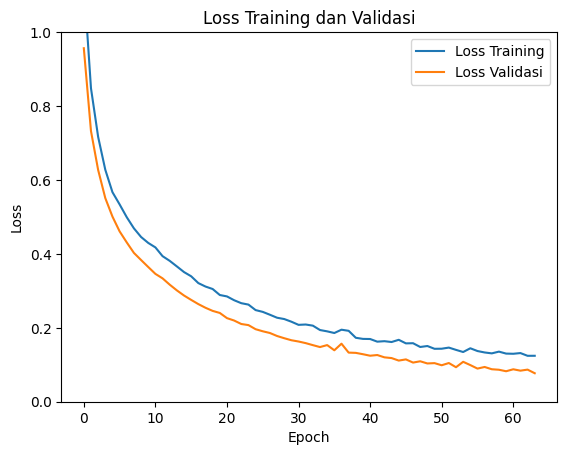

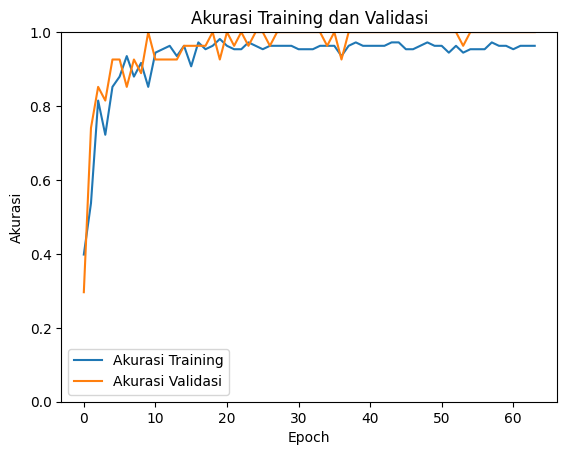

In [30]:
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='Akurasi Training')
plt.plot(history.history['val_acc'], label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.legend()
plt.show()


### **Load Dataset**

Dataset MNIST (Modified National Institute of Standards and Technology) adalah dataset yang berisi 70.000 gambar grayscale
dari digit tulisan tangan, dengan resolusi 28x28 piksel. Dataset ini sering digunakan sebagai benchmark dalam bidang
machine learning dan computer vision. Dataset ini terbagi menjadi dua bagian:
- Training set: 60.000 gambar
- Test set: 10.000 gambar

Setiap gambar direpresentasikan sebagai matriks 28x28 piksel, di mana setiap piksel memiliki nilai intensitas antara 0 dan 255.
Label yang menyertai gambar adalah angka digit (0-9) yang menunjukkan angka yang ditulis dalam gambar tersebut.

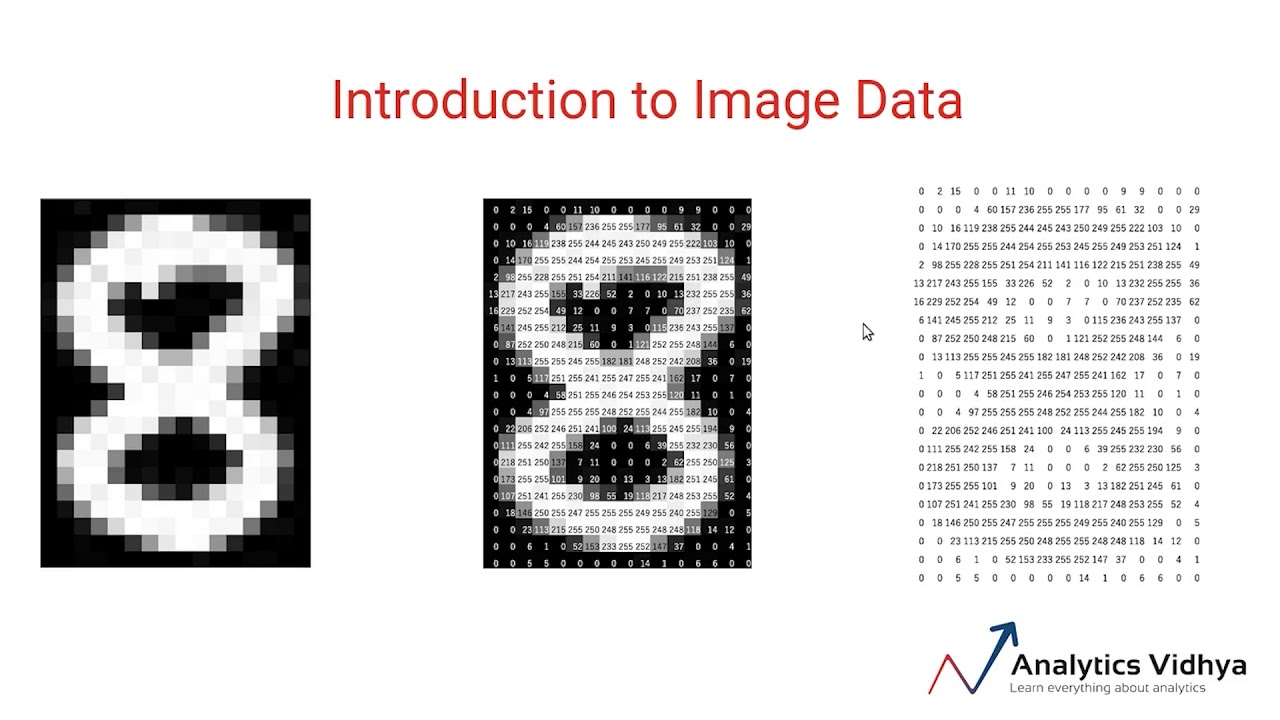

In [31]:
from keras.datasets import mnist
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = mnist.load_data()

In [32]:
X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

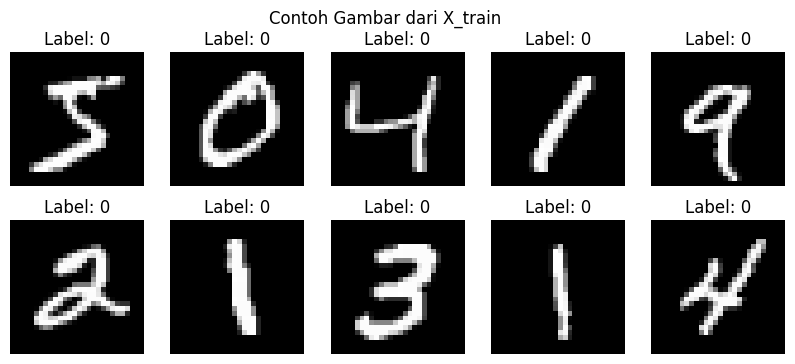

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train_mnist[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_mnist[i])}")
    plt.axis('off')
plt.suptitle("Contoh Gambar dari X_train")
plt.show()

In [34]:
X_train_mnist = X_train_mnist.reshape(-1, 28, 28, 1)  # Mengubah bentuk data training menjadi (jumlah sampel, 28, 28, 1)
X_test_mnist = X_test_mnist.reshape(-1, 28, 28, 1)  # Mengubah bentuk data test menjadi (jumlah sampel, 28, 28, 1)

X_train_mnist = X_train_mnist.astype('float32')
X_test_mnist = X_test_mnist.astype('float32')

X_train_mnist /= 255
X_test_mnist /= 255
y_train_mnist = to_categorical(y_train_mnist, 10)
y_test_mnist = to_categorical(y_test_mnist, 10)

### **Define and Compile Model**

In [ ]:

model1 = Sequential() 

model1.add(Flatten(input_shape=(28, 28, 1)))  

model1.add(Dense(64, activation='relu'))  

model1.add(Dense(10, activation='softmax')) 

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) 

model1.summary() 

d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model**

In [ ]:
history1 = model1.fit(X_train_mnist, y_train_mnist, epochs=10, batch_size=100, validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8880 - loss: 0.4095 - val_acc: 0.9366 - val_loss: 0.2251
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9408 - loss: 0.2056 - val_acc: 0.9487 - val_loss: 0.1751
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9545 - loss: 0.1590 - val_acc: 0.9566 - val_loss: 0.1476
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9626 - loss: 0.1301 - val_acc: 0.9616 - val_loss: 0.1251
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9686 - loss: 0.1098 - val_acc: 0.9656 - val_loss: 0.1141
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9733 - loss: 0.0943 - val_acc: 0.9656 - val_loss: 0.1112
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9755 - loss: 0.0834 - val_acc: 0.9693 - val_loss: 0.1023
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9786 - loss: 0.0729 - val_acc: 0.9715 - val_loss: 0.0949
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - ac

### **Evaluation Model**

In [ ]:

model1.evaluate(X_test_mnist, y_test_mnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9714 - loss: 0.0954


[0.09543949365615845, 0.9714000225067139]

### **Save and Load Model**

In [ ]:
from keras.models import load_model
model1.save('my_model1.keras')


model_simpan = load_model('my_model1.keras')

### **Visualization**

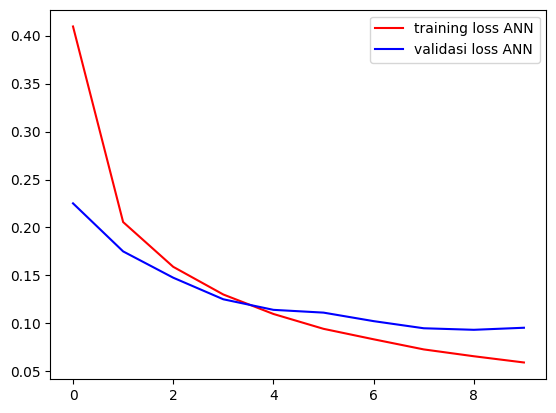

In [ ]:
epochs = range(10)  
loss1 = history1.history['loss'] 
val_loss1 = history1.history['val_loss']  
plt.plot(epochs, loss1, 'r', label='training loss ANN')  
plt.plot(epochs, val_loss1, 'b', label='validasi loss ANN')  
plt.legend()  
plt.show()  

### **Prediction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Label actual: 3
Label prediction: 3


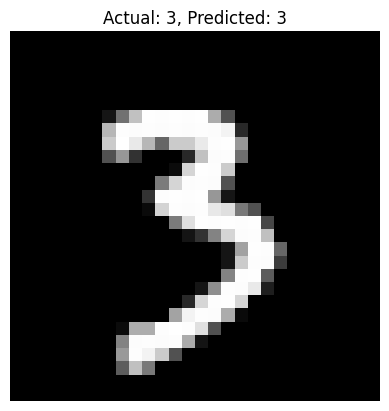

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Prediksi
pred = model_simpan.predict(X_test_mnist)

print('Label actual:', np.argmax(y_test_mnist[30]))
print('Label prediction:', np.argmax(pred[30]))

plt.imshow(X_test_mnist[30], cmap='gray')  
plt.title(f"Actual: {np.argmax(y_test_mnist[30])}, Predicted: {np.argmax(pred[30])}")
plt.axis('off')
plt.show()


# **Convolutional Neural Network (CNN)**

### **Import Library**

In [41]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt


### **Load Dataset**

### **Define and Compile Model**

In [42]:
model2 = Sequential()

model2.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(MaxPooling2D(2, 2))
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.summary()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])


d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,866 (413.54 KB)

 Trainable params: 105,866 (413.54 KB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model**

In [43]:
history2 = model2.fit(X_train_mnist, y_train_mnist, epochs=10, batch_size=100, validation_data=(X_test_mnist, y_test_mnist))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - acc: 0.9284 - loss: 0.2415 - val_acc: 0.9777 - val_loss: 0.0683
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9790 - loss: 0.0678 - val_acc: 0.9832 - val_loss: 0.0465
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9855 - loss: 0.0480 - val_acc: 0.9846 - val_loss: 0.0434
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9883 - loss: 0.0378 - val_acc: 0.9865 - val_loss: 0.0379
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9904 - loss: 0.0307 - val_acc: 0.9894 - val_loss: 0.0326
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9923 - loss: 0.0250 - val_acc: 0.9884 - val_loss: 0.0340
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9933 - loss: 0.0205 - val_acc: 0.9893 - val_loss: 0.0324
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - acc: 0.9945 - loss: 0.0174 - val_acc: 0.9888 - val_loss: 0.0382
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/

### **Evaluation Model**

In [44]:
model2.evaluate(X_test_mnist, y_test_mnist)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - acc: 0.9871 - loss: 0.0397


[0.039744310081005096, 0.9871000051498413]

### **Save and Load Model**

In [45]:

model2.save('my_model2.keras')

model_simpan2 = load_model('my_model2.keras')

### **Visualization**

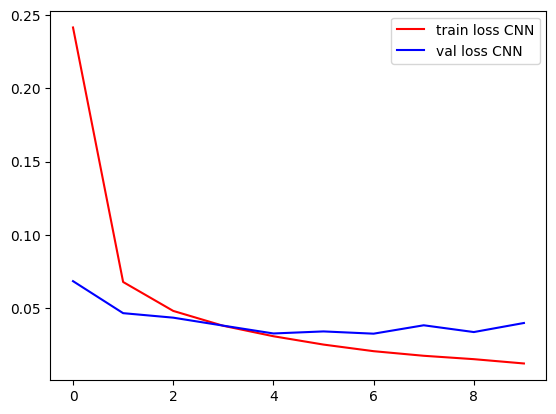

In [46]:
# Visualisasi hasil training dan validation loss
epochs = range(10)
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
plt.plot(epochs, loss2, 'r', label='train loss CNN')
plt.plot(epochs, val_loss2, 'b', label='val loss CNN')
plt.legend()
plt.show()

### **Prediction**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
label actual: 2
label prediction: 2


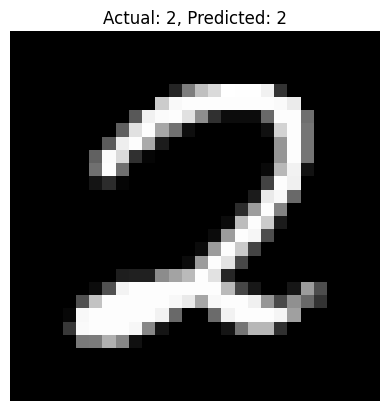

In [ ]:

pred = model_simpan2.predict(X_test_mnist)


print('label actual:', np.argmax(y_test_mnist[35]))
print('label prediction:', np.argmax(pred[35]))

plt.imshow(X_test_mnist[35], cmap='gray')  
plt.title(f"Actual: {np.argmax(y_test_mnist[35])}, Predicted: {np.argmax(pred[35])}")
plt.axis('off')
plt.show()

# Test

In [ ]:
import keras
from keras.datasets import cifar10  
from keras.utils import to_categorical  
from keras.models import Sequential, load_model  
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D  
import numpy as np  
import matplotlib.pyplot as plt  


In [ ]:
(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()


In [53]:
# Menampilkan shape dataset
print("Shape X_train:", X_train_cifar.shape)
print("Shape y_train:", y_train_cifar.shape)
print("Shape X_test:", X_test_cifar.shape)
print("Shape y_test:", y_test_cifar.shape)

Shape X_train: (50000, 32, 32, 3)
Shape y_train: (50000, 1)
Shape X_test: (10000, 32, 32, 3)
Shape y_test: (10000, 1)


In [ ]:

X_train_cifar = X_train_cifar.astype('float32') / 255.0
X_test_cifar = X_test_cifar.astype('float32') / 255.0

y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

In [ ]:
# Create the ANN model
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(32, 32, 3)))  
ann_model.add(Dense(512, activation='relu'))  
ann_model.add(Dense(256, activation='relu'))  
ann_model.add(Dense(10, activation='softmax'))  

# Compile the ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the ANN model
history_ann = ann_model.fit(X_train_cifar, y_train_cifar, epochs=10, batch_size=100, validation_data=(X_test_cifar, y_test_cifar))

# Save the ANN model
ann_model.save('ann_cifar10.h5')


d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.3264 - loss: 1.8731 - val_accuracy: 0.3896 - val_loss: 1.7006
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4025 - loss: 1.6731 - val_accuracy: 0.4233 - val_loss: 1.6158
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4314 - loss: 1.5935 - val_accuracy: 0.4384 - val_loss: 1.5632
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4533 - loss: 1.5401 - val_accuracy: 0.4678 - val_loss: 1.5090
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4673 - loss: 1.4931 - val_accuracy: 0.4696 - val_loss: 1.4847
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4821 - loss: 1.4530 - val_accuracy: 0.4716 - val_loss: 1.4863
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4935 - loss: 1.4217 - val_accuracy: 0.4941 - val_loss: 1.4262
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5022 - loss: 1.3937 - val_accu

In [ ]:
# Create the CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  
cnn_model.add(MaxPooling2D((2, 2))) 
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))  
cnn_model.add(MaxPooling2D((2, 2))) 
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))  
cnn_model.add(Flatten())  
cnn_model.add(Dense(64, activation='relu'))  
cnn_model.add(Dense(10, activation='softmax'))  

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history_cnn = cnn_model.fit(X_train_cifar, y_train_cifar, epochs=10, batch_size=100, validation_data=(X_test_cifar, y_test_cifar))

# Save the CNN model
cnn_model.save('cnn_cifar10.h5')


d:\conda_envs\datasci\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.3965 - loss: 1.6491 - val_accuracy: 0.4945 - val_loss: 1.3882
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.5474 - loss: 1.2728 - val_accuracy: 0.5776 - val_loss: 1.1969
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6063 - loss: 1.1232 - val_accuracy: 0.6229 - val_loss: 1.0641
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6439 - loss: 1.0181 - val_accuracy: 0.6380 - val_loss: 1.0205
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6714 - loss: 0.9390 - val_accuracy: 0.6706 - val_loss: 0.9438
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.6936 - loss: 0.8769 - val_accuracy: 0.6840 - val_loss: 0.9106
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7117 - loss: 0.8251 - val_accuracy: 0.6836 - val_loss: 0.9123
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.7254 - loss: 0.7852 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5006 - loss: 1.4147
ANN Test Accuracy: 0.5005999803543091
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7126 - loss: 0.8293
CNN Test Accuracy: 0.7125999927520752


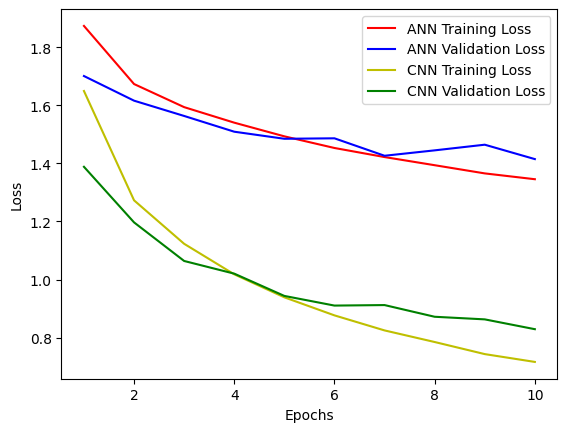

In [65]:
# Evaluate the ANN model
ann_eval = ann_model.evaluate(X_test_cifar, y_test_cifar)
print('ANN Test Accuracy:', ann_eval[1])

# Evaluate the CNN model
cnn_eval = cnn_model.evaluate(X_test_cifar, y_test_cifar)
print('CNN Test Accuracy:', cnn_eval[1])

# Plot the training and validation loss for both models
epochs = range(1, 11)
plt.plot(epochs, history_ann.history['loss'], 'r', label='ANN Training Loss')
plt.plot(epochs, history_ann.history['val_loss'], 'b', label='ANN Validation Loss')
plt.plot(epochs, history_cnn.history['loss'], 'y', label='CNN Training Loss')
plt.plot(epochs, history_cnn.history['val_loss'], 'g', label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
